In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
automoble_data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [3]:
#print 1st five rows of automoble data
automoble_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
#print the shape of the dataset
automoble_data.shape

(99, 13)

In [5]:
#checking information
automoble_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
#checking null values
automoble_data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [7]:
#checking duplicate values
automoble_data.duplicated().sum()

0

In [8]:
#summary statistics of the numerical columns
automoble_data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [9]:
#checking columns
automoble_data.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

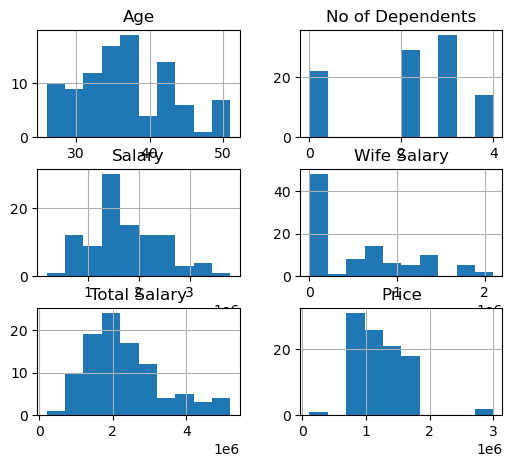

In [10]:
#distribution of numerical features
automoble_data.hist(figsize=(6, 5))
plt.show()

In [11]:
automoble_data["Profession"].value_counts()

Salaried    64
Business    35
Name: Profession, dtype: int64

<Axes: xlabel='Profession', ylabel='count'>

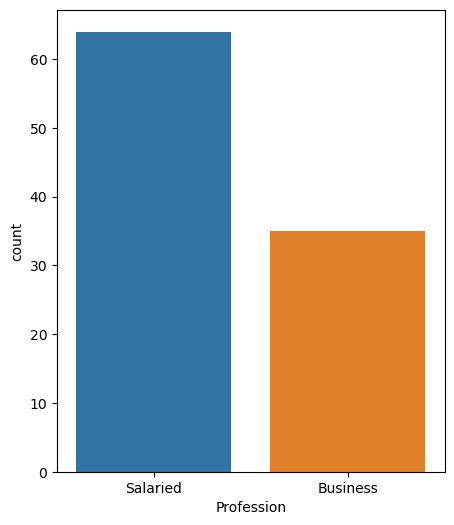

In [12]:
plt.figure(figsize = (5,6))
sns.countplot(x = "Profession",data = automoble_data)

In [13]:
automoble_data["Marrital Status"].value_counts()

Married    84
Single     15
Name: Marrital Status, dtype: int64

<Axes: xlabel='Marrital Status', ylabel='count'>

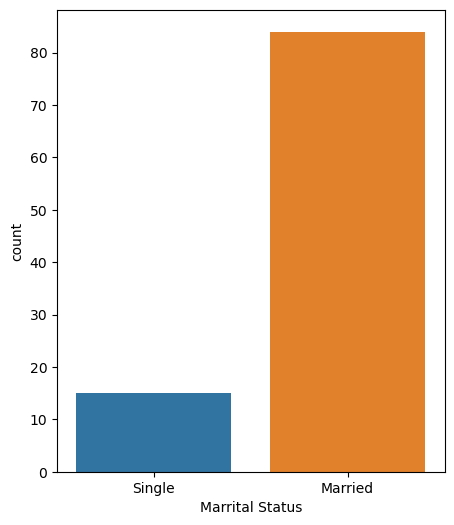

In [14]:
plt.figure(figsize = (5,6))
sns.countplot(x = "Marrital Status",data = automoble_data)

In [15]:
automoble_data["Education"].value_counts()

Post Graduate    56
Graduate         43
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

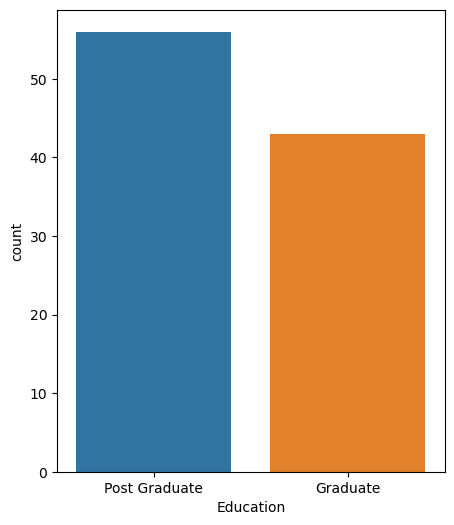

In [16]:
plt.figure(figsize = (5,6))
sns.countplot(x = "Education",data = automoble_data)

In [17]:
automoble_data["Personal loan"].value_counts()

No     67
Yes    32
Name: Personal loan, dtype: int64

<Axes: xlabel='Personal loan', ylabel='count'>

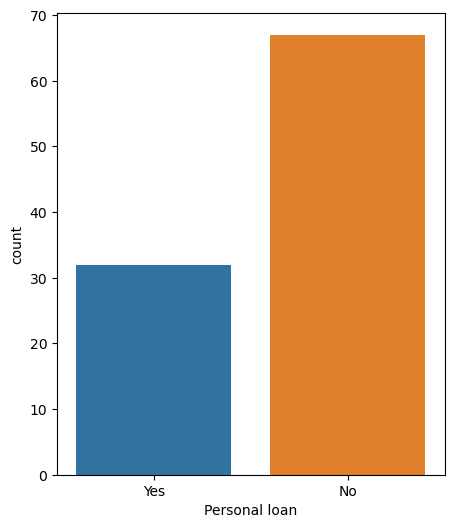

In [18]:
plt.figure(figsize = (5,6))
sns.countplot(x = "Personal loan",data = automoble_data)

In [19]:
automoble_data["House Loan"].value_counts()

No     62
Yes    37
Name: House Loan, dtype: int64

<Axes: xlabel='House Loan', ylabel='count'>

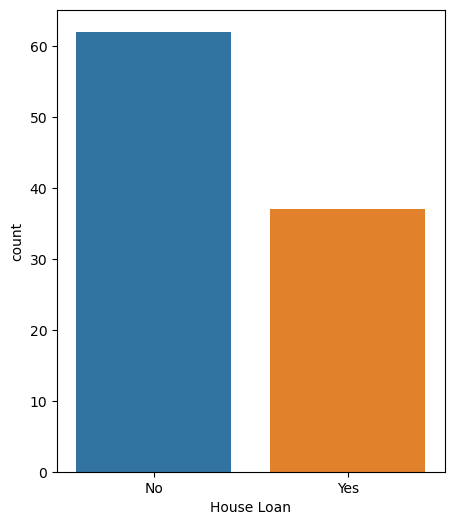

In [20]:
plt.figure(figsize = (5,6))
sns.countplot(x = "House Loan",data = automoble_data)

In [21]:
automoble_data["Make"].value_counts()

SUV        19
Baleno     19
Creata     14
i20        12
Ciaz       12
City       10
Duster      7
Verna       4
Luxuray     2
Name: Make, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'i20'),
  Text(1, 0, 'Ciaz'),
  Text(2, 0, 'Duster'),
  Text(3, 0, 'City'),
  Text(4, 0, 'SUV'),
  Text(5, 0, 'Baleno'),
  Text(6, 0, 'Verna'),
  Text(7, 0, 'Luxuray'),
  Text(8, 0, 'Creata')])

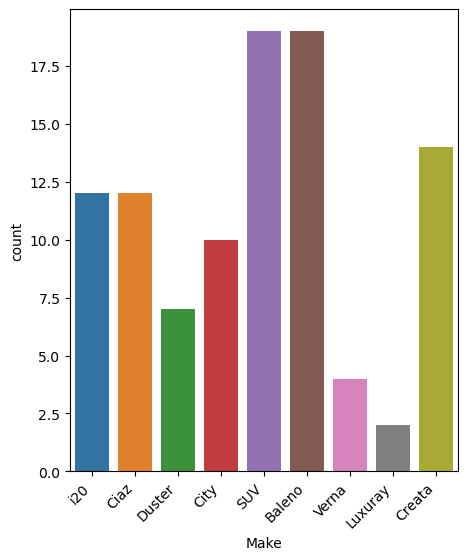

In [22]:
plt.figure(figsize = (5,6))
sns.countplot(x = "Make",data = automoble_data)
plt.xticks(rotation=45, ha="right")

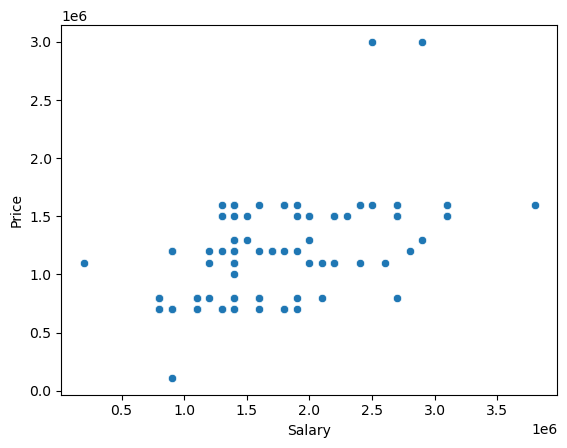

In [23]:
sns.scatterplot(x = "Salary", y = "Price", data = automoble_data)
plt.show()

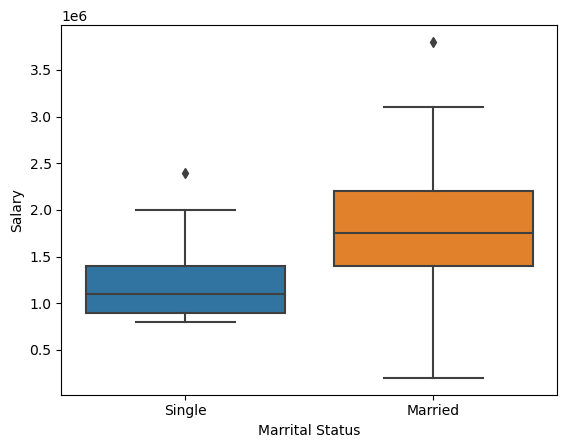

In [24]:
sns.boxplot(x = "Marrital Status", y = "Salary", data = automoble_data)
plt.show()

In [25]:
# Convert categorical variables into numerical using one-hot encoding
automoble_data = pd.get_dummies(automoble_data, columns=["Profession", "Marrital Status", "Education", "Personal loan", "House Loan", "Wife Working", "Make"], drop_first=True)

In [26]:
automoble_data.head()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,...,Wife Working_Yes,Wife Working_m,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20
0,27,0,800000,0,800000,800000,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
1,35,2,1400000,600000,2000000,1000000,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,45,4,1800000,0,1800000,1200000,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,41,3,1600000,600000,2200000,1200000,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,31,2,1800000,800000,2600000,1600000,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [27]:
# Create a new feature 'Family Size' by adding 'No of Dependents' and 1
automoble_data["Family Size"] = automoble_data["No of Dependents"] + 1

In [28]:
# Create a new feature 'Total Income' by adding 'Total Salary', 'Wife Salary', and any other income
automoble_data["Total Income"] = automoble_data["Total Salary"] + automoble_data["Wife Salary"]

In [29]:
automoble_data.head()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,...,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20,Family Size,Total Income
0,27,0,800000,0,800000,800000,1,1,1,1,...,0,0,0,0,0,0,0,1,1,800000
1,35,2,1400000,600000,2000000,1000000,1,0,1,1,...,1,0,0,0,0,0,0,0,3,2600000
2,45,4,1800000,0,1800000,1200000,0,0,0,1,...,0,0,0,1,0,0,0,0,5,1800000
3,41,3,1600000,600000,2200000,1200000,0,0,1,0,...,0,1,0,0,0,0,0,0,4,2800000
4,31,2,1800000,800000,2600000,1600000,1,0,1,1,...,0,0,0,0,0,1,0,0,3,3400000


In [30]:
#dropping unnecessary columns
automoble_data.drop(["No of Dependents", "Total Salary", "Wife Salary"], axis = 1, inplace = True)

In [31]:
automoble_data.head()

,Age,Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,House Loan_Yes,Wife Working_Yes,Wife Working_m,Make_Ciaz,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20,Family Size,Total Income
0,27,800000,800000,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,800000
1,35,1400000,1000000,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,3,2600000
2,45,1800000,1200000,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,5,1800000
3,41,1600000,1200000,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,4,2800000
4,31,1800000,1600000,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,3,3400000


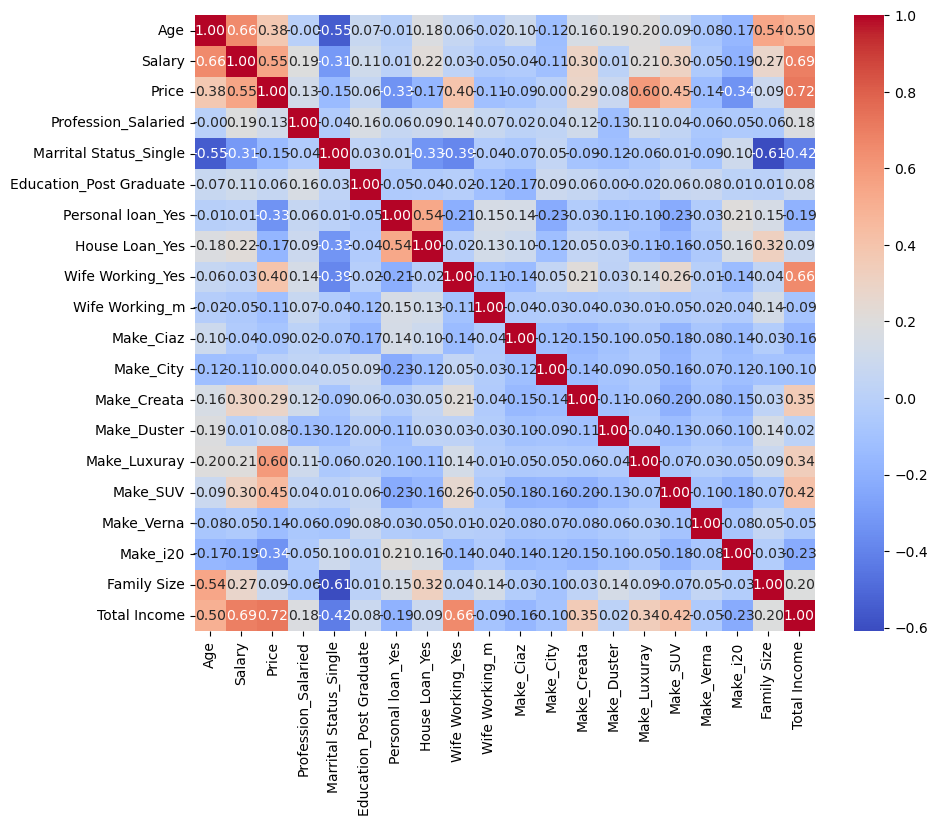

In [32]:
#calculate and visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = automoble_data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.show()

In [33]:
#preparing data for modeling
X = automoble_data.drop(["Price"], axis=1)
y = automoble_data["Price"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [35]:
X_train.shape, X_test.shape

((79, 19), (20, 19))

In [36]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Use the Elbow method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

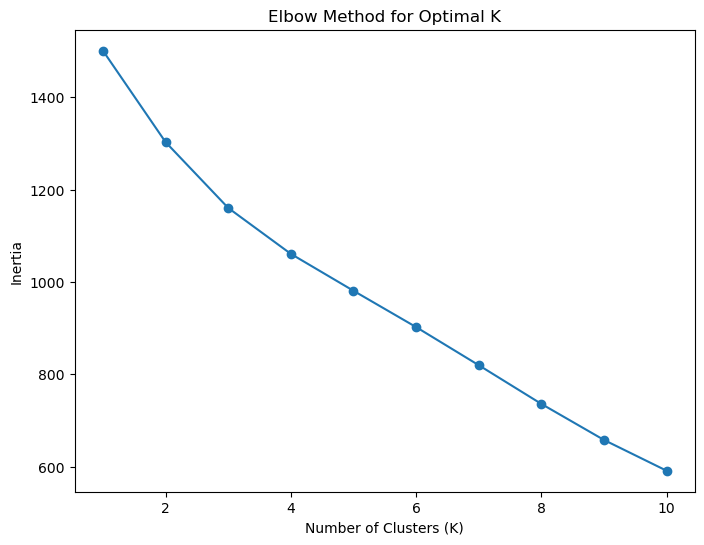

In [38]:
# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

In [39]:
#K-Means clustering to the entire dataset
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
automoble_data["Segment"] = kmeans.fit_predict(scaler.transform(X))

In [40]:
#modified dataset with the 'Segment' column
automoble_data.head()

,Age,Salary,Price,Profession_Salaried,Marrital Status_Single,Education_Post Graduate,Personal loan_Yes,House Loan_Yes,Wife Working_Yes,Wife Working_m,...,Make_City,Make_Creata,Make_Duster,Make_Luxuray,Make_SUV,Make_Verna,Make_i20,Family Size,Total Income,Segment
0,27,800000,800000,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,1,800000,0
1,35,1400000,1000000,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,3,2600000,2
2,45,1800000,1200000,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,5,1800000,2
3,41,1600000,1200000,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,4,2800000,2
4,31,1800000,1600000,1,0,1,1,0,1,0,...,0,0,0,0,1,0,0,3,3400000,1
